In [ ]:
# loading the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler # for KNN
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_wine

In [ ]:
# loading the dataset
data = load_wine()

In [ ]:
data

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [ ]:
df = pd.DataFrame(data.data, columns = data.feature_names)
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [ ]:
df['target'] = data.target
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [ ]:
df.shape

(178, 14)

In [ ]:
# analyzing the target column
df['target'].value_counts()

target
1    71
0    59
2    48
Name: count, dtype: int64

In [ ]:
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64

In [ ]:
# Splitting the dataset to X and y
# Split dataset into train and test
X = df.drop(columns=['target'])
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train.shape

(142, 13)

In [ ]:
X_test.shape

(36, 13)

In [ ]:
X_test.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
19,13.64,3.10,2.56,15.2,116.0,2.70,3.03,0.17,1.66,5.10,0.96,3.36,845.0
45,14.21,4.04,2.44,18.9,111.0,2.85,2.65,0.30,1.25,5.24,0.87,3.33,1080.0
140,12.93,2.81,2.70,21.0,96.0,1.54,0.50,0.53,0.75,4.60,0.77,2.31,600.0
30,13.73,1.50,2.70,22.5,101.0,3.00,3.25,0.29,2.38,5.70,1.19,2.71,1285.0
67,12.37,1.17,1.92,19.6,78.0,2.11,2.00,0.27,1.04,4.68,1.12,3.48,510.0


In [ ]:
y_test.head()

19     0
45     0
140    2
30     0
67     1
Name: target, dtype: int32

In [ ]:
# Scale data for KNN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# decision tree
dt_model = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

In [ ]:
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("\nDecision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.9444444444444444

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.93      1.00      0.97        14
           2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.95      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



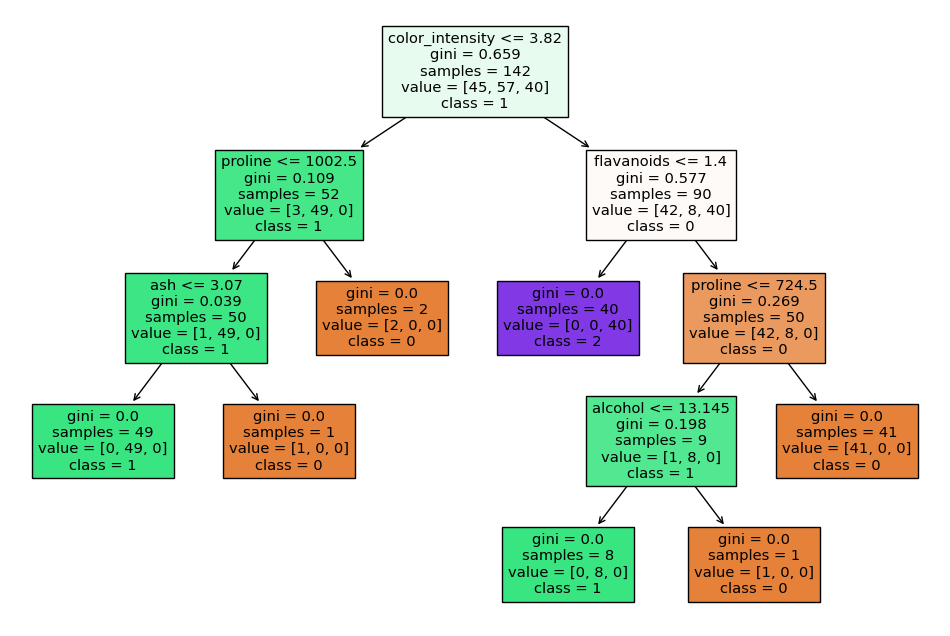

In [ ]:
# plotting the decision tree
plt.figure(figsize=(12,8))
plot_tree(dt_model, feature_names=X.columns, class_names=[str(i) for i in set(y)], filled=True)
plt.show()

In [ ]:
# KNN
# Scaled data is used

knn_model = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn_model.fit(X_train_scaled, y_train)
y_pred_knn = knn_model.predict(X_test_scaled)
print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print("\nKNN Classification Report:\n", classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.9444444444444444

KNN Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.86      0.92        14
           2       0.89      1.00      0.94         8

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36



In [ ]:
# hyper paremeters
# GridSearchCV
# RandomSearchCV

from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid_dt = {'max_depth': [3, 4, 5, 6], 'criterion': ['gini', 'entropy']}
gs_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5)
gs_dt.fit(X_train, y_train)
print("Best Decision Tree Parameters:", gs_dt.best_params_)

Best Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 3}


In [ ]:
best_dt = DecisionTreeClassifier(**gs_dt.best_params_, random_state=42)
best_dt.fit(X_train, y_train)
y_pred_best_dt = best_dt.predict(X_test)
print("Tuned Decision Tree Accuracy:", accuracy_score(y_test, y_pred_best_dt))
print("\nTuned Decision Tree Classification Report:\n", classification_report(y_test, y_pred_best_dt))

Tuned Decision Tree Accuracy: 0.9444444444444444

Tuned Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.88      1.00      0.93        14
           2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.96      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36



In [ ]:
# KNN hyper parameter tuning
param_grid_knn = {'n_neighbors': range(3, 10), 'metric': ['euclidean', 'manhattan']}
gs_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5)
gs_knn.fit(X_train_scaled, y_train)
print("Best KNN Parameters:", gs_knn.best_params_)

Best KNN Parameters: {'metric': 'manhattan', 'n_neighbors': 5}


In [ ]:
best_knn = KNeighborsClassifier(**gs_knn.best_params_)
best_knn.fit(X_train_scaled, y_train)
y_pred_best_knn = best_knn.predict(X_test_scaled)
print("Tuned KNN Accuracy:", accuracy_score(y_test, y_pred_best_knn))
print("\nTuned KNN Classification Report:\n", classification_report(y_test, y_pred_best_knn))

Tuned KNN Accuracy: 0.9444444444444444

Tuned KNN Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       1.00      0.86      0.92        14
           2       0.89      1.00      0.94         8

    accuracy                           0.94        36
   macro avg       0.94      0.95      0.94        36
weighted avg       0.95      0.94      0.94        36



In [ ]:
new_samp= X_test.iloc[2].values.reshape(1,-1)
new_samp_sc = scaler.transform(new_samp)

C:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# with decision tree
best_dt.predict(new_samp)

C:\Anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([2])

In [ ]:
# predict with knn
best_knn.predict(new_samp_sc)

array([2])